# Лекция №5

## Что такое контуры?
Контуры можно объяснить просто как кривую, соединяющую все непрерывные точки (вдоль границы), имеющие одинаковый цвет или интенсивность. Контуры являются полезным инструментом для анализа формы, а также для обнаружения и распознавания объектов.

Для большей точности используйте двоичные изображения. Поэтому перед нахождением контуров примените определение пороговых значений или границ.
В OpenCV поиск контуров похож на поиск белого объекта на черном фоне. Помните, что объект, который нужно найти, должен быть белым, а фон должен быть черным.
Давайте посмотрим, как найти контуры двоичного изображения:

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread('img/RGB_cube.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=0.15, ksize=5)
laplac = cv2.medianBlur(laplac, 3)
im2, contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


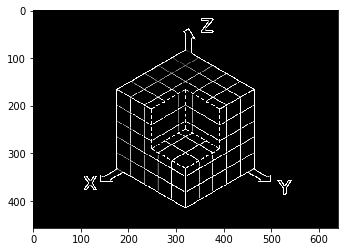

In [3]:
plt.imshow(laplac, cmap='gray');

Смотрите, в функции **cv2.findContours()** есть три аргумента, первый - исходное изображение, второй - режим поиска контура, третий - метод аппроксимации контура. И это выводит измененное изображение, контуры и иерархию. contours - это список всех контуров в изображении на языке Python. Каждый отдельный контур представляет собой массив Numpy с координатами (x, y) граничных точек объекта.

*Мы обсудим второй и третий аргументы, и подробнее об иерархии позже.*

### Как нарисовать контуры?
Для рисования контуров используется функция **cv2.drawContours()**. Его также можно использовать для рисования любой фигуры, если у вас есть граничные точки. Его первый аргумент является исходным изображением, второй аргумент - это контуры, которые должны быть переданы в виде списка Python, третий аргумент - это индекс контуров (полезно при рисовании отдельного контура. Чтобы нарисовать все контуры, передайте -1), а остальные аргументы - это цвет, толщина и т.п.

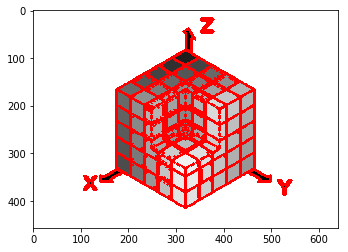

In [5]:
## нарисуем все найденные контуры
img1 = gray_img.copy()
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img1, contours, -1, (255,0,0), 3)

plt.imshow(img1);

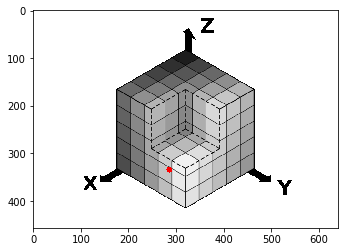

In [8]:
## нарисуем один выбранный контур
img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, contours, 53, (255,0,0), 10)

plt.imshow(img2);

## Contour Features

### 1. Моменты
Моменты изображения помогают вам рассчитать некоторые функции, такие как центр масс объекта, площадь объекта и т. д. Посетите страницу [википедии](https://en.wikipedia.org/wiki/Image_moment) по моментам изображения, если хотите в них углубиться.

Функция **cv2.moments()** предоставляет словарь всех вычисленных значений моментов.

In [37]:
img = cv2.imread('img/RGB_cube.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=1, ksize=5)
laplac = cv2.medianBlur(laplac, 3)
im2, contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[100]
M = cv2.moments(cnt)
M

{'m00': 1311.5,
 'm10': 374766.8333333333,
 'm01': 398632.6666666666,
 'm20': 107282145.91666666,
 'm11': 113859163.54166666,
 'm02': 121296141.75,
 'm30': 30765924110.45,
 'm21': 32578689349.933334,
 'm12': 34629362207.566666,
 'm03': 36948216401.3,
 'mu20': 190892.1105710119,
 'mu11': -51856.01600690186,
 'mu02': 131061.35825181007,
 'mu30': 487463.8866844177,
 'mu21': -266107.6853415072,
 'mu12': -14792.28963728249,
 'mu03': 374144.60594940186,
 'nu20': 0.1109817043087488,
 'nu11': -0.030148281235367454,
 'nu02': 0.07619703540547573,
 'nu30': 0.007825673232243896,
 'nu21': -0.0042720534729982955,
 'nu12': -0.00023747323282847146,
 'nu03': 0.006006462238016428}

In [38]:
## Коэффициент асимметрии
import math
sigma_x = math.sqrt(M['m20']/M['m00'])
sigma_y = math.sqrt(M['m02']/M['m00'])

k_x = M['m30']/sigma_x**3
k_y = M['m03']/sigma_y**3

k_x, k_y

(1315.0165812314067, 1313.637206903704)

Из этих моментов вы можете извлечь полезные данные, такие как площадь, центроид и т.д. Центроид определяется отношениями, ${C_x = \frac{M_{10}}{M_{00}}}$ and ${C_y = \frac{M_{01}}{M_{00}}}$.

Cx = 285 Cy = 303


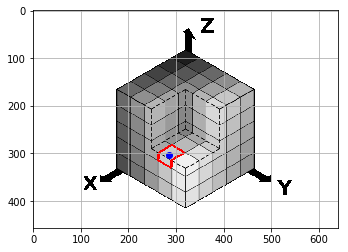

In [55]:
Cx = int(M['m10']/M['m00'])
Cy = int(M['m01']/M['m00'])
print('Cx =', Cx, 'Cy =', Cy)

img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cnt = contours[100]
cv2.drawContours(img2, [cnt], 0, (255,0,0), 3)
plt.scatter(Cx, Cy, color='blue')

plt.grid()
plt.imshow(img2);

### 2. Контурная зона
Площадь контура задается функцией **cv2.contourArea()** или из моментов, **M['m00']**.

In [56]:
area = cv2.contourArea(cnt)
area

1311.5

### 3. Периметр контура
Это также называется длиной дуги. Это можно узнать с помощью функции **cv2.arcLength()**. Второй аргумент указывает, является ли фигура замкнутым контуром (если передан True) или просто кривой.

In [58]:
perimeter = cv2.arcLength(cnt,True)

print(round(perimeter, 3))

165.581


### 4. Контурное приближение
Он приближает форму контура к другой форме с меньшим количеством вершин в зависимости от заданной нами точности. Это реализация алгоритма Дугласа-Пекера. Проверьте страницу википедии на алгоритм и демонстрацию.

Чтобы понять это, предположим, что вы пытаетесь найти квадрат на изображении, но из-за некоторых проблем на изображении вы получили не идеальный квадрат, а "плохую форму" (как показано на первом изображении ниже). Теперь вы можете использовать эту функцию для аппроксимации формы. В этом случае второй аргумент называется эпсилон, который является максимальным расстоянием от контура до приближенного контура. Это параметр точности. Для правильного вывода необходим мудрый выбор эпсилона.

<img src="img/approx.jpg" alt="Drawing" style="width: 600px;"/> 

Выше, на втором изображении, зеленая линия показывает приблизительную кривую для эпсилона = $10$% длины дуги. Третье изображение показывает то же самое для эпсилона = $1$% длины дуги. Третий аргумент указывает, является ли кривая замкнутой или нет.

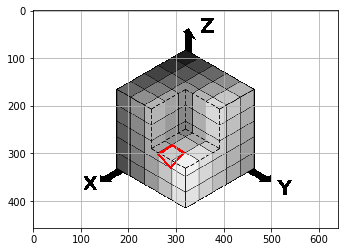

In [11]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [approx], 0, (255,0,0), 3)

plt.grid()
plt.imshow(img2);

### 5. Выпуклый контур
Выпуклая оболочка будет похожа на контурную аппроксимацию, но это не так (оба могут давать одинаковые результаты в некоторых случаях). Здесь функция **cv2.convexHull()** проверяет кривую на наличие дефектов выпуклости и исправляет ее. Вообще говоря, выпуклые кривые $-$ это кривые, которые всегда выпуклые или, по крайней мере, плоские. И если он выпуклый внутри, это называется дефектами выпуклости. Например, проверьте изображение ниже. Красная линия показывает выпуклый корпус руки. Двусторонние стрелки показывают дефекты выпуклости, которые представляют собой локальные максимальные отклонения корпуса от контуров.
<img src="img/convexitydefects.jpg" alt="Drawing" style="width: 300px;"/> 

**hull = cv2.convexHull(points, clockwise, returnPoints)**

* **points** $-$ точки контура.

* **clockwise** $-$ флаг ориентации. Если это правда, выходной выпуклый корпус ориентирован по часовой стрелке. В противном случае он ориентирован против часовой стрелки.

* **returnPoints** $-$ по умолчанию True. Затем он возвращает координаты точек корпуса. Если False, он возвращает индексы точек контура, соответствующие точкам корпуса.

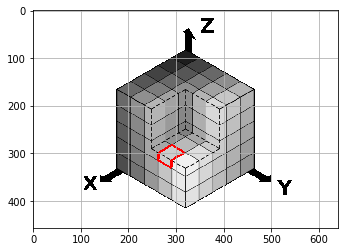

In [64]:
hull = cv2.convexHull(cnt)
hull_id = cv2.convexHull(cnt, returnPoints=False)

plt.grid()
plt.imshow(img2);

Но если вы хотите найти дефекты выпуклости, вам нужно передать returnPoints = False.

### 6. Проверка выпуклости
Есть функция, чтобы проверить, является ли кривая выпуклой или нет, **cv2.isContourConvex()**. Это просто возвращает True или False

Подумайте, как это можно сделать без этой функции?

In [13]:
k = cv2.isContourConvex(cnt)

print(k)

False


### 7. Ограничивающий прямоугольник

#### 7.a. Прямой ограничивающий прямоугольник
Это прямой прямоугольник, он не учитывает вращение объекта. Таким образом, площадь ограничивающего прямоугольника не будет минимальной. Он находится функцией **cv2.boundingRect()**.

Пусть $(x,y)$ $-$ верхняя левая координата прямоугольника, а $(w,h)$ $-$ его ширина и высота.

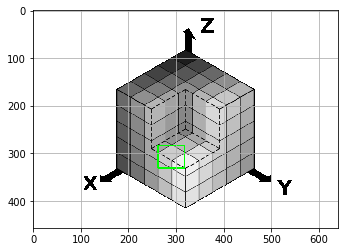

In [83]:
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

plt.grid()
plt.imshow(img2);

#### 7.b. Повернутый прямоугольник
Здесь ограничивающий прямоугольник рисуется с минимальной площадью, поэтому он учитывает и вращение. Используемая функция $-$ **cv2.minAreaRect()**. Он возвращает структуру **Box2D**, которая содержит следующие детали $-$ (центр $(x, y)$, (ширина, высота), угол поворота). Но чтобы нарисовать этот прямоугольник, нам нужно $4$ угла прямоугольника. Получается функцией **cv2.boxPoints()**.

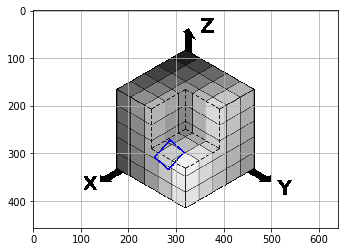

In [84]:
img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)


rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img2,[box],0,(0,0,255),2)

plt.grid()
plt.imshow(img2);

### 8. Подгонка линии
Точно так же мы можем подогнать линию к набору точек. Ниже изображение содержит набор белых точек. Мы можем приблизить к нему прямую линию.

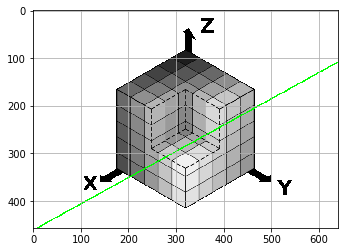

In [16]:
img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img2,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.grid()
plt.imshow(img2);

## Contour Properties

### 1. Соотношение сторон
Это отношение ширины к высоте ограничивающего прямоугольника объекта.

${AspectRatio = \frac{Width}{Height}}$

In [86]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

aspect_ratio

1.1458333333333333

### 2. Степень
Степень $-$ это отношение площади контура к площади ограничивающего прямоугольника.

${Extent=\frac{Object\ Area}{Bounding\ Rectangle\ Area}}$

In [88]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

extent

0.496780303030303

### 3. Solidity
Solidity is the ratio of contour area to its convex hull area.

$Solidity = \frac{Contour \ Area}{Convex \ Hull \ Area}$


In [19]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

### 4. Equivalent Diameter
Equivalent Diameter is the diameter of the circle whose area is same as the contour area.

$Equivalent \ Diameter = \sqrt{\frac{4 \cdot \ Contour \ Area}{\pi}}$

In [20]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

### 5. Orientation
Orientation is the angle at which object is directed. Following method also gives the __Major Axis__ and __Minor Axis__ lengths.


In [21]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

### 6. Mask and Pixel Points
In some cases, we may need all the points which comprises that object. It can be done as follows:


In [23]:
mask = np.zeros(gray_img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

Here, two methods, one using Numpy functions, next one using OpenCV function (last commented line) are given to do the same. Results are also same, but with a slight difference. Numpy gives coordinates in **(row, column)** format, while OpenCV gives coordinates in **(x,y)** format. So basically the answers will be interchanged. Note that, row = x and column = y.

### 7. Maximum Value, Minimum Value and their locations
We can find these parameters using a mask image.

In [25]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_img,mask = mask)

### 8. Mean Color or Mean Intensity
Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.


In [26]:
mean_val = cv2.mean(img,mask = mask)

### 9. Extreme Points
Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.


In [27]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

(262, 314) (316, 298) 
 (289, 283) (288, 330)


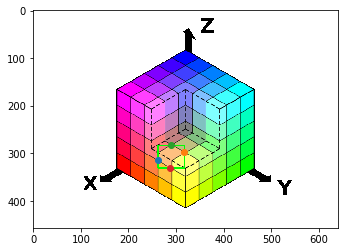

In [34]:
print(leftmost, rightmost,'\n', topmost, bottommost)

plt.imshow(img)
plt.scatter(leftmost[0], leftmost[1])
plt.scatter(rightmost[0], rightmost[1])
plt.scatter(topmost[0], topmost[1])
plt.scatter(bottommost[0], bottommost[1]);

# Kaggle

In [1]:
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_x = pd.read_csv('cifar10/train_x.csv', index_col=0, header=None)
train_y = pd.read_csv('cifar10/train_y.csv', index_col=0)
test_x = pd.read_csv('cifar10/test_x.csv', index_col=0, header=None)

In [3]:
def viz_img(df, i):
    plt.imshow(df.values.reshape(df.shape[0], 32, 32, 3)[i])
    plt.show()

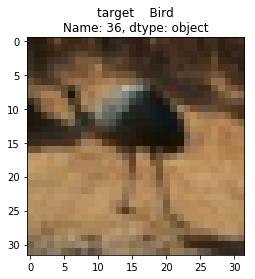

(32, 32, 3)


True

In [129]:
n = 36

plt.title(train_y.iloc[n])
viz_img(train_x, n)

img = train_x.values.reshape(train_x.shape[0], 32, 32, 3)[n]
img = np.uint8(img.copy())
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
cv2.imwrite('plane.png',img)

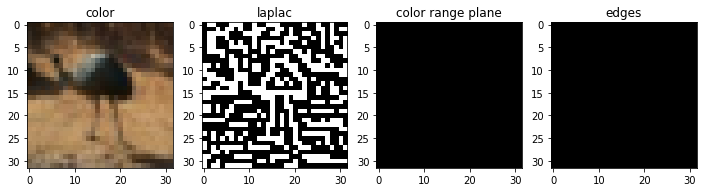

In [137]:
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_copy = img.copy()
gray_img = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)

## поиск области по цвету
low = (97,7,20)
high = (110,52,250)
only_plane = cv2.inRange(img_copy, low, high)

img_hsv = cv2.cvtColor(img_copy, cv2.COLOR_RGB2HSV)
low_hsv = (0, 0, 0)
high_hsv = (0, 0, 255)
only_plane = cv2.inRange(img_hsv, low_hsv, high_hsv)

only_plane = cv2.medianBlur(only_plane, 3)

#laplac = cv2.threshold(gray_img, 160, 255, cv2.THRESH_BINARY)[1]
laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=4, ksize=3)
#laplac = cv2.medianBlur(laplac, 3)
#laplac = cv2.threshold(laplac, 160, 255, cv2.THRESH_BINARY)[1]
laplac = cv2.adaptiveThreshold(laplac, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 5)
edges = cv2.Canny(only_plane, 300, 300)

im2, contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

fig, m_axs = plt.subplots(1, 4, figsize=(12,8))
ax1, ax2, ax3, ax4 = m_axs

ax1.set_title('color')
ax1.imshow(cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR))
ax2.set_title('laplac')
ax2.imshow(laplac, cmap='gray')
ax3.set_title('color range plane')
ax3.imshow(only_plane, cmap='gray')
ax4.set_title('edges')
ax4.imshow(edges, cmap='gray');

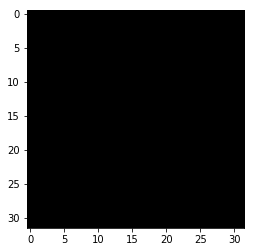

In [89]:
plt.imshow(edges, cmap='gray');

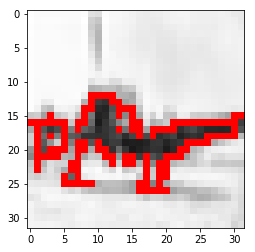

In [90]:
img1 = img_copy.copy()
#img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img1, contours, -1, (255,0,0), 1)

plt.imshow(img1);

In [97]:
0.03*255

7.6499999999999995

In [98]:

0.1*255

25.5

In [99]:
0.8*255

204.0

In [100]:
0.97*255

247.35